# 1. Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]

mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]

std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]

test_data -= mean
test_data /= std

In [4]:
train_data.shape

(404, 13)

In [5]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

import tensorflow as tf

input_layer = tf.keras.layers.Input(shape=(train_data.shape[1], ))
dense_1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
dense_2 = tf.keras.layers.Dense(64, activation='relu')(dense_1)
outputs = tf.keras.layers.Dense(1, activation='relu')(dense_2)

model = tf.keras.Model(inputs=input_layer, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


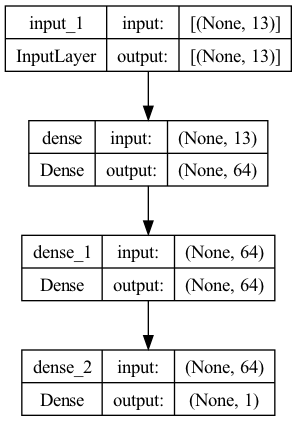

In [6]:
from tensorflow.keras import models, utils

utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [8]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]

history = model.fit(train_data, train_labels,
                    epochs=200,
                    batch_size=512,
                    validation_data=(test_data, test_labels))

Epoch 1/200
1/1 [==============================] - 0s 258ms/step - loss: 577.2645 - mae: 22.2250 - val_loss: 604.1191 - val_mae: 22.8573
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 573.7936 - mae: 22.1578 - val_loss: 600.1693 - val_mae: 22.7793
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 569.8663 - mae: 22.0770 - val_loss: 595.8638 - val_mae: 22.6918
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 565.6834 - mae: 21.9885 - val_loss: 591.3600 - val_mae: 22.5982
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 561.3416 - mae: 21.8933 - val_loss: 586.7391 - val_mae: 22.5001
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 556.9061 - mae: 21.7944 - val_loss: 582.0396 - val_mae: 22.3987
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 552.4184 - mae: 21.6932 - val_loss: 577.2884 - val_mae: 22.2947
Epoch 8/200
1/1 [==============================]

Epoch 61/200
1/1 [==============================] - 0s 11ms/step - loss: 157.9740 - mae: 10.3225 - val_loss: 159.0311 - val_mae: 10.7609
Epoch 62/200
1/1 [==============================] - 0s 12ms/step - loss: 151.3437 - mae: 10.0594 - val_loss: 152.4298 - val_mae: 10.5186
Epoch 63/200
1/1 [==============================] - 0s 10ms/step - loss: 145.0620 - mae: 9.8111 - val_loss: 146.2043 - val_mae: 10.2746
Epoch 64/200
1/1 [==============================] - 0s 10ms/step - loss: 139.1339 - mae: 9.5742 - val_loss: 140.3519 - val_mae: 10.0294
Epoch 65/200
1/1 [==============================] - 0s 11ms/step - loss: 133.5594 - mae: 9.3410 - val_loss: 134.8643 - val_mae: 9.7834
Epoch 66/200
1/1 [==============================] - 0s 10ms/step - loss: 128.3338 - mae: 9.1176 - val_loss: 129.7376 - val_mae: 9.5395
Epoch 67/200
1/1 [==============================] - 0s 9ms/step - loss: 123.4483 - mae: 8.9066 - val_loss: 124.9561 - val_mae: 9.3085
Epoch 68/200
1/1 [==============================] 

1/1 [==============================] - 0s 12ms/step - loss: 17.5246 - mae: 2.9539 - val_loss: 22.0010 - val_mae: 3.5924
Epoch 184/200
1/1 [==============================] - 0s 11ms/step - loss: 17.4360 - mae: 2.9456 - val_loss: 21.9634 - val_mae: 3.5873
Epoch 185/200
1/1 [==============================] - 0s 11ms/step - loss: 17.3486 - mae: 2.9373 - val_loss: 21.9273 - val_mae: 3.5823
Epoch 186/200
1/1 [==============================] - 0s 11ms/step - loss: 17.2624 - mae: 2.9291 - val_loss: 21.8925 - val_mae: 3.5773
Epoch 187/200
1/1 [==============================] - 0s 11ms/step - loss: 17.1773 - mae: 2.9209 - val_loss: 21.8594 - val_mae: 3.5724
Epoch 188/200
1/1 [==============================] - 0s 15ms/step - loss: 17.0932 - mae: 2.9128 - val_loss: 21.8276 - val_mae: 3.5676
Epoch 189/200
1/1 [==============================] - 0s 40ms/step - loss: 17.0103 - mae: 2.9049 - val_loss: 21.7963 - val_mae: 3.5627
Epoch 190/200
1/1 [==============================] - 0s 13ms/step - loss: 16

/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


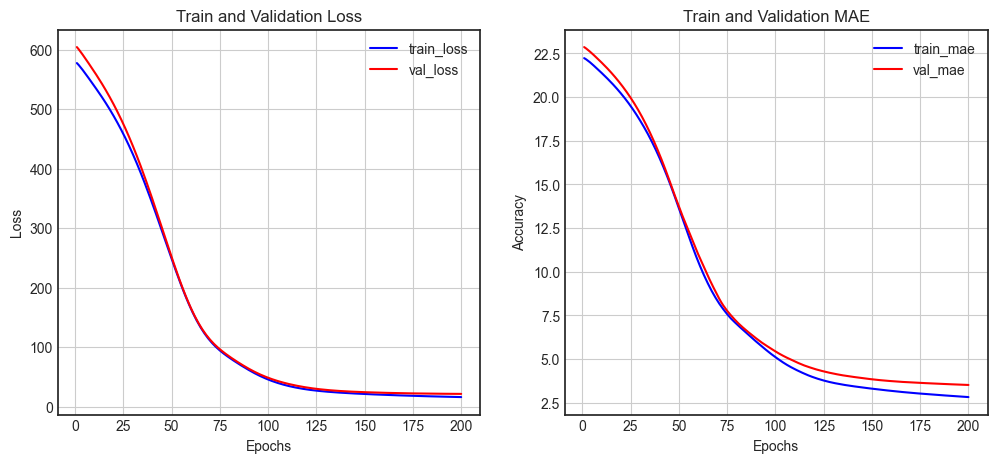

In [9]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [10]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 873us/step - loss: 21.5184 - mae: 3.5152


[21.51844024658203, 3.515247344970703]

In [12]:
del model